In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [62]:
df = pd.read_csv("C:\\Users\\dell\\OneDrive\\Desktop\\Imp. Doc\\DA_case_study\\bs.csv")
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
print("Shape of Dataset")
print(df.shape)
print()

Shape of Dataset
(550, 7)



In [5]:
print("unique elements in Features")
print()
print(df.nunique())

unique elements in Features

Name           351
Author         248
User Rating     14
Reviews        346
Price           40
Year            11
Genre            2
dtype: int64


In [6]:
print("duplicated Series values")
print(df.duplicated().sum())
print()

duplicated Series values
0



In [7]:
print("duplicated Series values")
print(df.duplicated().sum())
print()

duplicated Series values
0



In [8]:
print(df.isna())

      Name  Author  User Rating  Reviews  Price   Year  Genre
0    False   False        False    False  False  False  False
1    False   False        False    False  False  False  False
2    False   False        False    False  False  False  False
3    False   False        False    False  False  False  False
4    False   False        False    False  False  False  False
..     ...     ...          ...      ...    ...    ...    ...
545  False   False        False    False  False  False  False
546  False   False        False    False  False  False  False
547  False   False        False    False  False  False  False
548  False   False        False    False  False  False  False
549  False   False        False    False  False  False  False

[550 rows x 7 columns]


In [9]:
print(df.count())

Name           550
Author         550
User Rating    550
Reviews        550
Price          550
Year           550
Genre          550
dtype: int64


Name           100.0
Author         100.0
User Rating    100.0
Reviews        100.0
Price          100.0
Year           100.0
Genre          100.0
dtype: float64


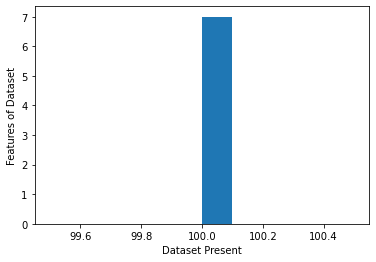

In [10]:
print(df.count()/df.isna().count()*100)
x=df.count()/df.isna().count()*100
plt.hist(x)
plt.ylabel("Features of Dataset")
plt.xlabel("Dataset Present")
plt.show()

In [11]:
print()
print('\033[1m'+"Pairwise correlation of all columns in the dataframe")
print()


Pairwise correlation of all columns in the dataframe



In [17]:
df.corr()
print()

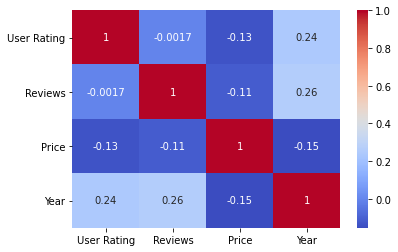

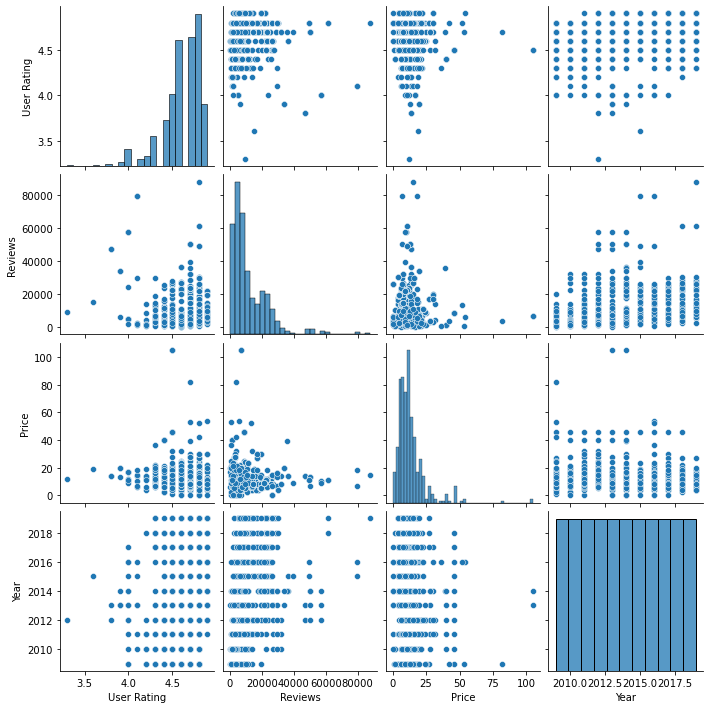

In [16]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
sns.pairplot(df)

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

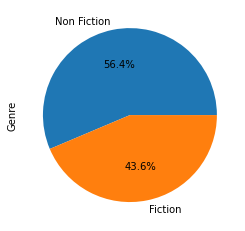

In [18]:
# Almost 56% rated as best selling books are Fiction
df['Genre'].value_counts().plot.pie(autopct="%.1f%%");
df['Genre'].value_counts()

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


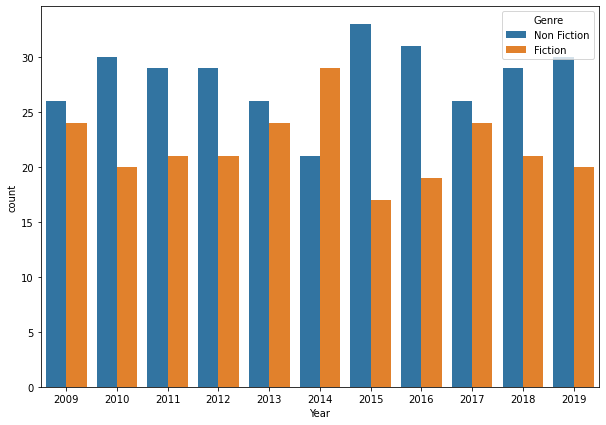

In [21]:
plt.figure(figsize=(10,7))
sns.countplot(df['Year'],hue=df['Genre'])
plt.show()

In [22]:
print('\033[1m'+"max User Rating")
print(df['User Rating'].max())
print()
print('\033[1m'+"Avg User Rating")
print(df['User Rating'].mean())
print()
print('\033[1m'+"Most Often User Rating")
print(df['User Rating'].mode())

max User Rating
4.9

Avg User Rating
4.618363636363641

Most Often User Rating
0    4.8
dtype: float64


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 864x432 with 0 Axes>

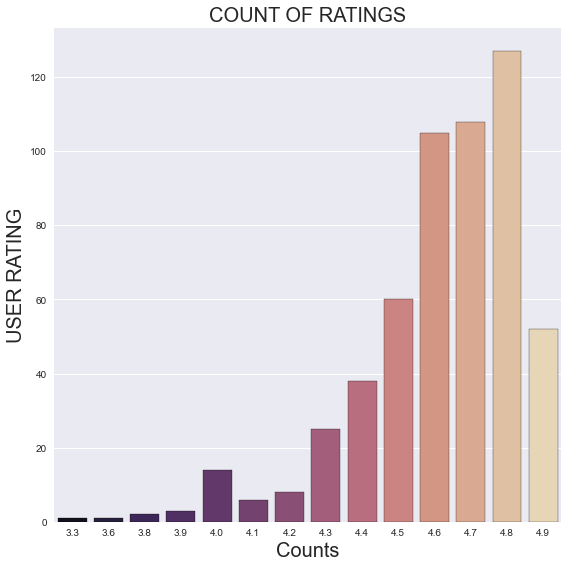

In [25]:
plt.figure(figsize=(12,6))
plt.style.use("seaborn")
plt.figure(figsize=(20,20))
plt.subplot(221)
fund= sns.countplot(df["User Rating"], palette="magma",edgecolor='black',saturation=0.50)
fund.set_xticklabels(fund.get_xticklabels(),fontsize=10)
plt.title("COUNT OF RATINGS",fontsize=20)
fund.set_xlabel("Counts", fontsize=20,)
fund.set_ylabel("USER RATING", fontsize=20)
plt.show()

In [26]:
#it tells us about number of books Author have !!
a=dict(df['Author'].value_counts())
b=list(a.items())
print(b[:10])

[('Jeff Kinney', 12), ('Suzanne Collins', 11), ('Rick Riordan', 11), ('Gary Chapman', 11), ('American Psychological Association', 10), ('Gallup', 9), ('Dr. Seuss', 9), ('Rob Elliott', 8), ('Eric Carle', 7), ('Stephenie Meyer', 7)]


In [27]:
#Author's Books having Maximum rating: 4.9 
maxrating=df[df['User Rating']==4.9]
aumax=maxrating.groupby(['Author']).size().reset_index(name="Count")
aumax.sort_values(by='Count',ascending=False).head(20)

,Author,Count
5,Dr. Seuss,8
4,Dav Pilkey,7
7,Eric Carle,7
18,Sarah Young,6
6,Emily Winfield Martin,4
9,J.K. Rowling,3
19,Sherri Duskey Rinker,2
17,Rush Limbaugh,2
1,Bill Martin Jr.,2
13,Mark R. Levin,1


In [28]:
#'Where the Crawdads sing' Book of Delia Owens has maximum user reviews (87841).
print(df[df['Reviews']==df['Reviews'].max()])

                        Name       Author  User Rating  Reviews  Price  Year  \
534  Where the Crawdads Sing  Delia Owens          4.8    87841     15  2019   

       Genre  
534  Fiction  


In [29]:
#'Oh, the Places You'll Go!' Book of Dr. Seuss has maximum user reviews (21834) with highest rating books among amazon bestseller.
#This has also received highest ratings from users.
print(maxrating[maxrating['Reviews']==maxrating['Reviews'].max()])

                          Name     Author  User Rating  Reviews  Price  Year  \
245  Oh, the Places You'll Go!  Dr. Seuss          4.9    21834      8  2012   
246  Oh, the Places You'll Go!  Dr. Seuss          4.9    21834      8  2013   
247  Oh, the Places You'll Go!  Dr. Seuss          4.9    21834      8  2014   
248  Oh, the Places You'll Go!  Dr. Seuss          4.9    21834      8  2015   
249  Oh, the Places You'll Go!  Dr. Seuss          4.9    21834      8  2016   
250  Oh, the Places You'll Go!  Dr. Seuss          4.9    21834      8  2017   
251  Oh, the Places You'll Go!  Dr. Seuss          4.9    21834      8  2018   
252  Oh, the Places You'll Go!  Dr. Seuss          4.9    21834      8  2019   

       Genre  
245  Fiction  
246  Fiction  
247  Fiction  
248  Fiction  
249  Fiction  
250  Fiction  
251  Fiction  
252  Fiction  


C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


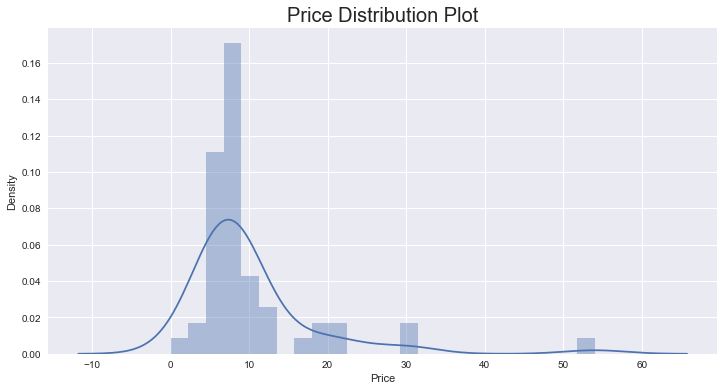

0    8
dtype: int64

In [30]:
#Most of books having rating 4.9 have price 8 
plt.figure(figsize=(12,6))
sns.distplot(maxrating['Price'])
plt.title('Price Distribution Plot',fontsize=20)
plt.show()
maxrating['Price'].mode()

In [33]:
from wordcloud import WordCloud, STOPWORDS

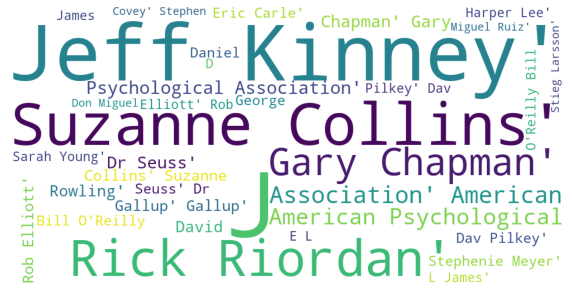

In [36]:
#we can see some names of author from [Author's Books having Maximum rating: 4.9 ] clearly 
imp_words = df['Author'].to_list()

wordcloud = WordCloud(width = 1000, height = 500, 
                background_color ='White', 
                min_font_size = 20).generate(str(imp_words))
plt.figure(figsize = (10,7)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.show()

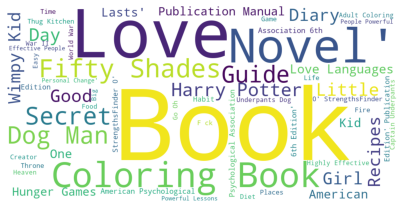

In [37]:
imp_words = df['Name'].to_list()
wordcloud = WordCloud(width = 1000, height = 500,  background_color ='White', min_font_size = 15).generate(str(imp_words))
plt.figure(figsize = (7,7)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.show()

In [39]:
import autoviz
from autoviz.AutoViz_Class import AutoViz_Class

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


In [40]:
av=AutoViz_Class()

Shape of your Data Set: (550, 7)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  1
    Number of Date Time Columns =  1
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    7 Predictors classified...
        This does not include the Target column(s)
        2 variables removed since they were ID or low-information variables


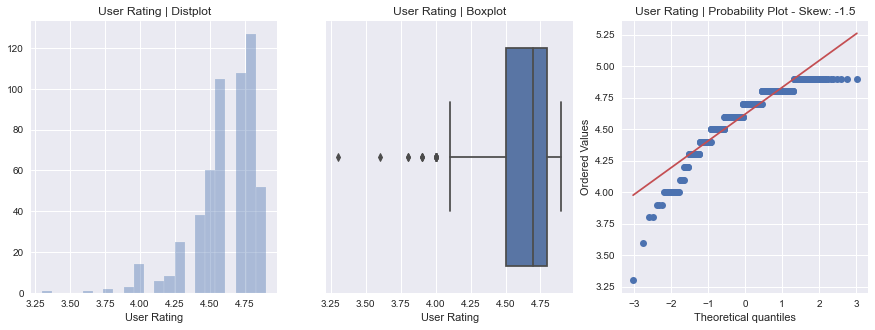

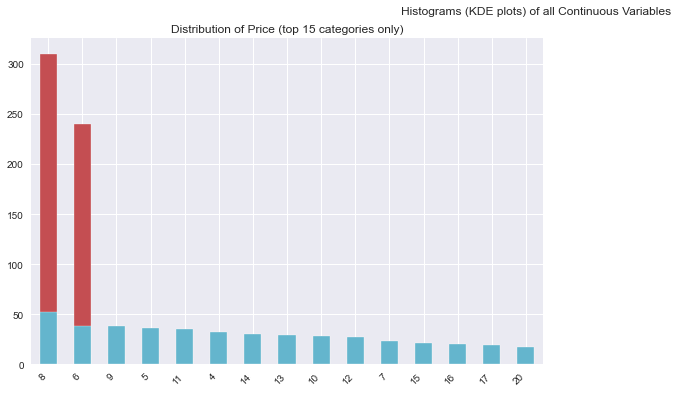

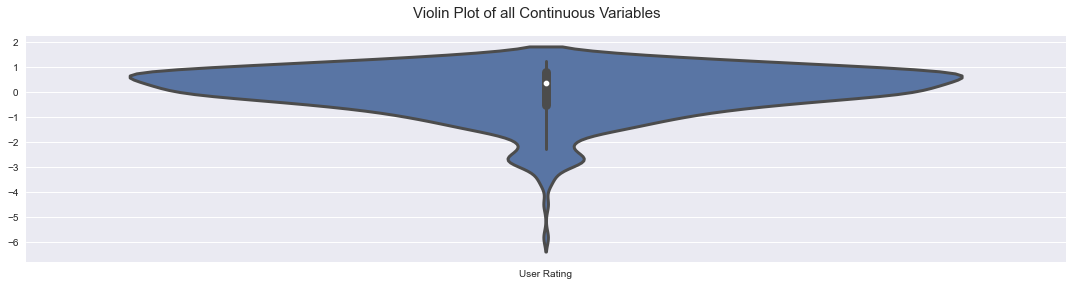

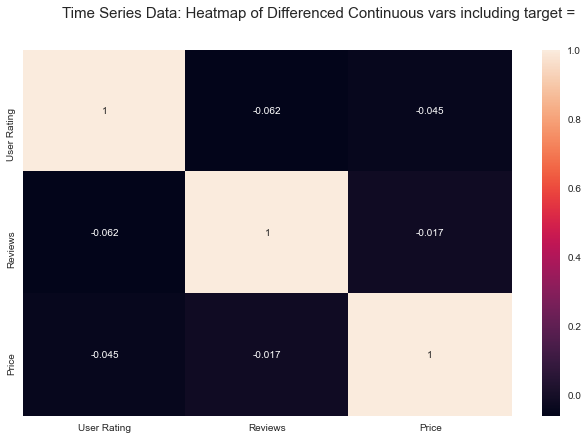

<Figure size 1080x0 with 0 Axes>

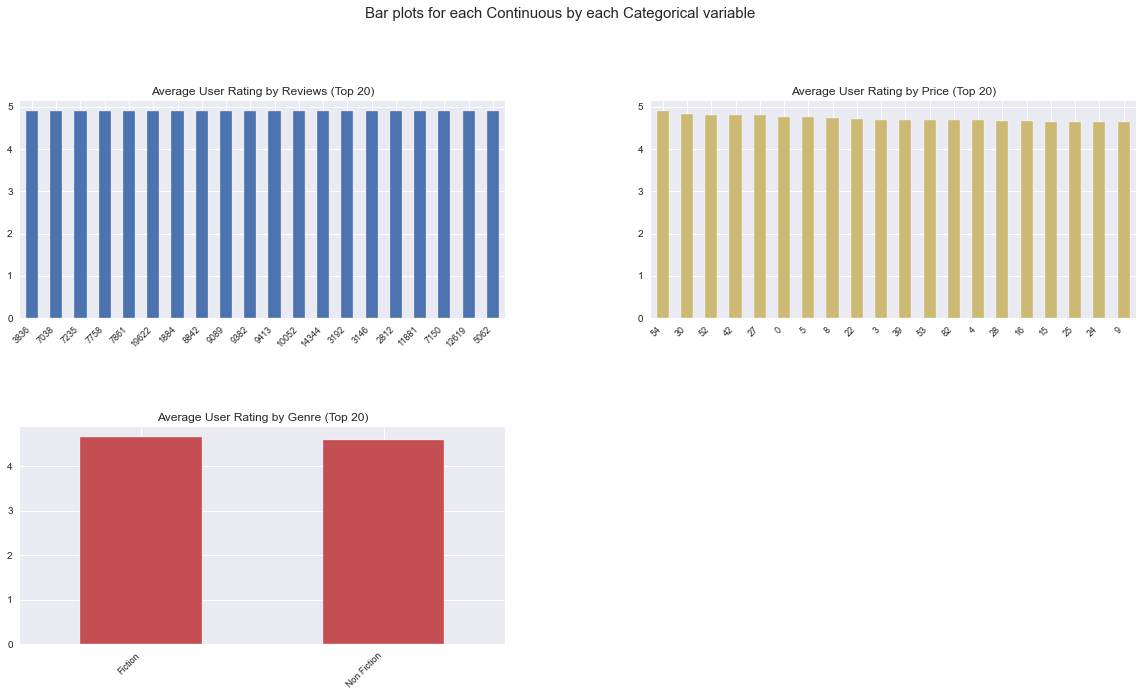

Time to run AutoViz (in seconds) = 2.726

 ###################### VISUALIZATION Completed ########################


In [41]:
autoviz_eda=av.AutoViz("C:\\Users\\dell\\OneDrive\\Desktop\\Imp. Doc\\DA_case_study\\bs.csv")

In [42]:
#Predict User Rating of a Book

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics


LE=LabelEncoder()

LE.fit(df['Genre'])
df['Genre']=LE.transform(df['Genre'])
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,1
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,0
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,1
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,0
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,1


In [43]:
col =["Reviews","Price","Year","Genre"]
# X =df.[[col]].values 
X =df.iloc[:,3:8].values 
y =df[["User Rating"]]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# import 
from sklearn.linear_model import LinearRegression

# object
model = LinearRegression()
# training - > fit

model.fit(X_train, y_train)

LinearRegression()

In [46]:
prediction=model.predict(X_test)

In [48]:
prediction.shape

(110, 1)

In [50]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

RMSE:  0.2295578451526141


In [51]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
m1 = RandomForestRegressor()
m1.fit(X_train, y_train)

RandomForestRegressor()

In [52]:
Prediction=m1.predict(X_test)

In [53]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, Prediction)))

RMSE:  0.20609651313710436


In [54]:
# Gradient Boosting 
from sklearn.ensemble import GradientBoostingRegressor
m2 = GradientBoostingRegressor()
m2.fit(X_train, y_train)

GradientBoostingRegressor()

In [55]:
Prediction=m2.predict(X_test)

In [56]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, Prediction)))

RMSE:  0.21146679589545805


In [58]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=11).fit(X_train , y_train)
Prediction=dt.predict(X_test)


In [59]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, Prediction)))

RMSE:  0.2666249619522021


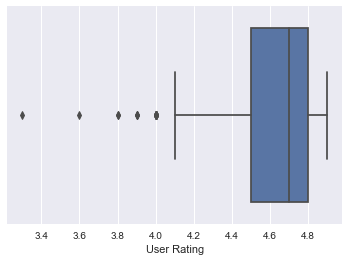

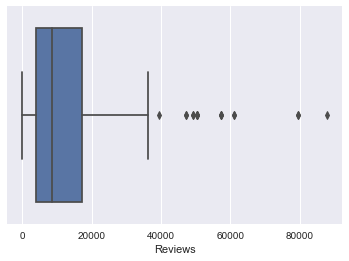

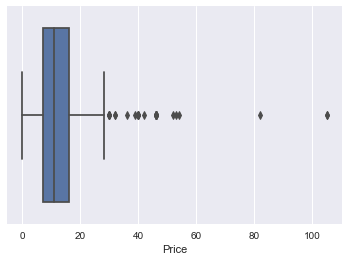

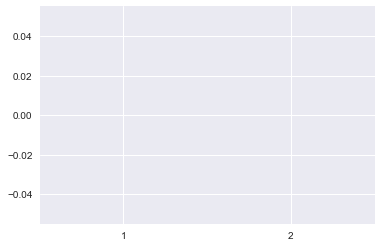

In [60]:
# general trend + Outlier
sns.boxplot(df["User Rating"])
plt.show()
sns.boxplot(df["Reviews"])
plt.show()
sns.boxplot(df["Price"])
plt.show()
plt.boxplot([df[df['Genre']=='Fiction']['User Rating'], df[df['Genre']=='Non Fiction']['User Rating']])
plt.show()